# **Micro_Fossil_DataScience**
Fossil Data Viewing and Analysis

Load the data

Display each slice in every direction

Show a 3D isosurface plot

In [1]:
!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0
!conda install scikit-image

Solving environment: ...working... done

# All requested packages already installed.



In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import graphviz

import scikitimage.io as io
from scikitimage.io import imread
from scikitimage.util.montage import montage2d


ModuleNotFoundError: No module named 'scikitimage'

In [3]:
fossil_path = "Gut-PhilElvCropped.tif"
fossil_data = imread(fossil_path)
print('Loading Fossil Data sized {}'.format(fossil_data.shape))

Loading Fossil Data sized (250, 296, 349)


Text(0.5, 1.0, 'Slice Histogram')

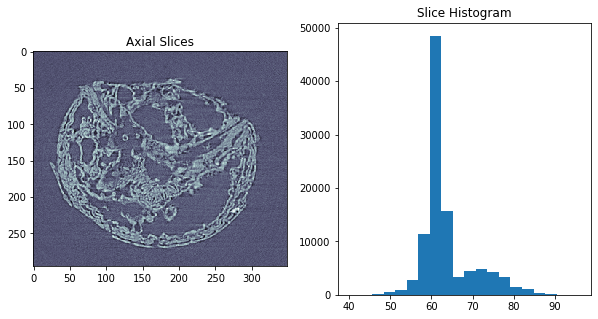

In [4]:
%matplotlib inline
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 20)
ax2.set_title('Slice Histogram')

In [14]:
from PIL import Image
import numpy 

im = Image.open('Gut-PhilElvCropped.tif') 
imarray = numpy.array(im) 
imarray.shape 
im.show()

# **Filtro**

Aqui usamos um filtro simples para limpar os dados

Text(0.5, 1.0, 'Filtered Slice')

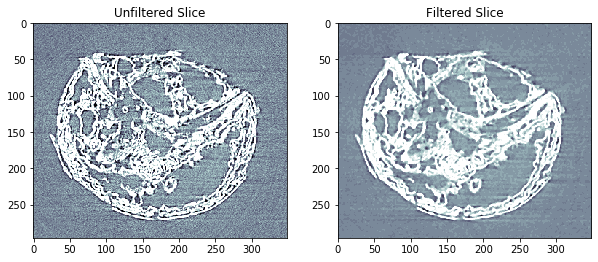

In [5]:
%matplotlib inline
from scipy.ndimage.filters import median_filter
# filter the data
filter_fossil_data = median_filter(fossil_data, (3,3,3))

# setup the plot
slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]
# setup the default image arguments
im_args = dict(cmap = 'bone', vmin = 50, vmax = 70)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.imshow(test_slice, **im_args)
ax1.set_title('Unfiltered Slice')
_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtered Slice')

# **Showing Various Slices**
Visualização de diferentes seções do microfossil

Limitação dos dados

NameError: name 'montage2d' is not defined

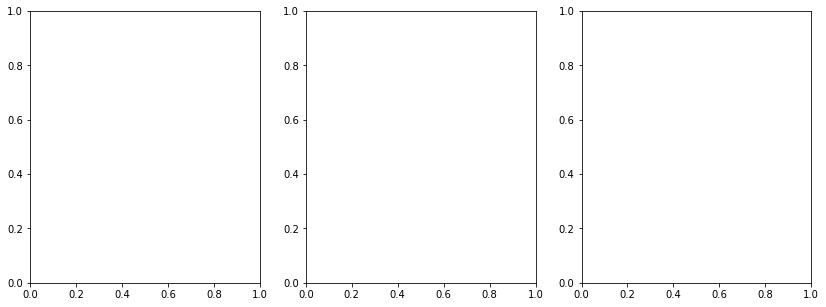

In [6]:
%matplotlib inline
skip_border = 50
skip_middle = 4
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Saggital Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Coronal Slices')
ax3.axis('off')

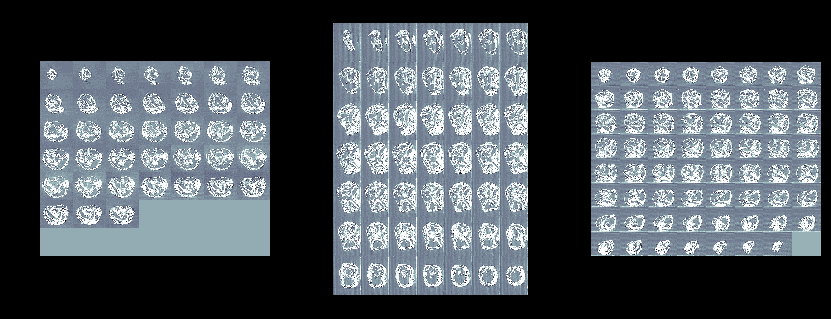

Text(0.5, 1.0, 'Slice with Threshold')

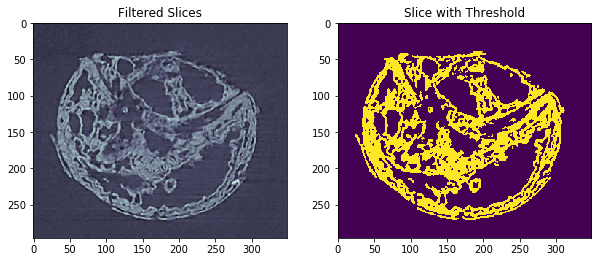

In [10]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
thresh_fossil_data = filter_fossil_data > 65
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(thresh_slice)
ax2.set_title('Slice with Threshold')

## **Morfologia do corpo**
Modelo 3d do corpo fóssil

In [7]:
%matplotlib inline
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(5))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(close_slice)
ax2.set_title('Slice After Closing')

NameError: name 'thresh_fossil_data' is not defined

In [8]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

In [9]:
from scipy.ndimage import zoom
# we downsample the image to make 3d rendering quicker
fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
# now we display it with a nice mesh
_ = show_3d_mesh(fossil_downscale, 0.5)

NameError: name 'closed_fossil_data' is not defined

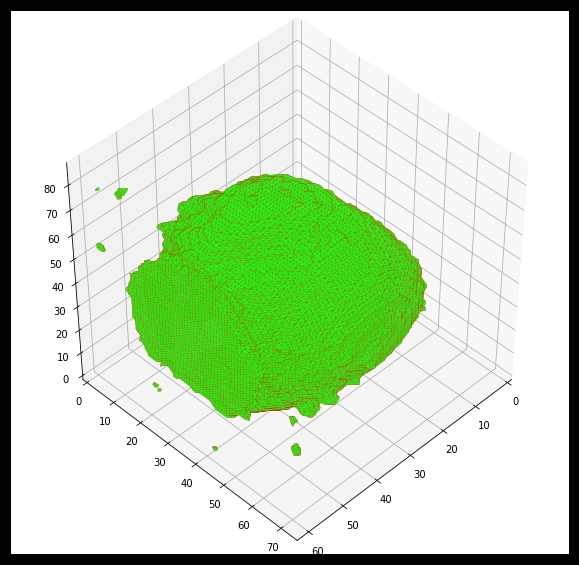

# Estatistica
Modelos estatisticos, graficos e data science de dados .csv

In [11]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

NameError: name 'X_train' is not defined

In [13]:
dados = pd.read_tiff('Gut-PhilElvCropped.tif', sep=';')
dados.head()
dados.shape

AttributeError: module 'pandas' has no attribute 'read_tiff'

In [ ]:
#boxspot

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

In [ ]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('variavel x', fontsize=20)
ax.set_xlabel('variavel y', fontsize=16)
ax

In [ ]:
# distribuição de frequência

ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('variavel x', fontsize=20)
ax.set_xlabel('variavel y', fontsize=16)
ax

In [ ]:
# dispersão entre as variaveis

ax = sns.pairplot(dados, y_vars='X', x_vars=['x', 'y', 'z'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['x', 'y', 'z'], kind='w', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
# transformando os dados, distribuição normal

np.log(1)

In [ ]:
dados['log_v'] = np.log(dados['v'])
dados['log_x'] = np.log(dados['x'])
dados['log_y'] = np.log(dados['y'] + 1)
dados['log_z'] = np.log(dados['z'] + 1)
dados.head()

In [ ]:
# DF var dependente (Y)

ax = sns.distplot(dados['log_v'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

In [ ]:
# dispersão entre variaveis

ax = sns.pairplot(dados, y_vars='x', x_vars=['x', 'y', 'z'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# Dataset e Mecanismo de treino 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y = dados['x']

In [ ]:
X = dados[['x', 'y', 'z']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [ ]:
#regressão linear

X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

In [ ]:
# modelo avaliado variaveis explicativas e estimativa de modelo

X = dados[['log_Area', 'log_Dist_Praia']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

In [ ]:
# estimando modelos 

from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))
y_previsto = modelo.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

In [ ]:
# previsões pontuais

entrada = X_test[0:1]
entrada

In [ ]:
modelo.predict(entrada)[0]

In [ ]:
np.exp(modelo.predict(entrada)[0])

In [ ]:
# Simulados simples

Variavel x = 0
Variavel y = 1
entrada = [[np.log(x), np.log(z + 1)]]

print('get {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

In [ ]:
# interpretação do modelo

modelo.intercept_
np.exp(modelo.intercept_)
modelo.coef_
X.columns
index = ['var x', 'log x', 'log z']

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

# Analise grafica final

In [ ]:
y_previsto_train = modelo.predict(X_train)

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax